In [37]:
import json
import matplotlib.pyplot as plt
import numpy as np
import math
import random
from scipy.stats import expon
from utils import *


In [38]:
def importData(file):

    # open json file
    with open(file) as f:
        data = json.load(f)

    keys = [i for i in data.keys()]

    good_dict = {}

    for key in keys:

        # vectors = data[key]["vectors"]

        measurement = data[key]["attributes"]["measurement"]
        repetition = data[key]["attributes"]["repetition"]
        configs = data[key]["config"]
        mergedConfigs={}
        for config in configs:
            mergedConfigs.update(config)
        # timeLimit = mergedConfigs["sim-time-limit"]

        
        # assert timeLimit.endswith('s'), "Time limit format is incorrect"
        # timeLimit = timeLimit[:-1]  # Remove the 's' at the end

        good_dict[measurement]={}
        good_dict[measurement]['measurement']=measurement
        good_dict[measurement]['parameters']=dict(item.split("=") for item in measurement.split(", "))
        good_dict[measurement]['param']={a['name']: a['value'] for a in data[key]['parameters']}
        good_dict[measurement]['scalars']={a['name']: a['value'] for a in data[key]['scalars']}
        good_dict[measurement]['repetition']=int(repetition)
        # good_dict[measurement]['timeLimit']=int(timeLimit)
        good_dict[measurement]['modules']={}

        # for a in vectors:

        #     module = a["module"]
        #     name = a["name"]

        #     if not module in good_dict[measurement]['modules']:
        #         good_dict[measurement]['modules'][module] = {}

        #     good_dict[measurement]['modules'][module][name] = {}
        #     good_dict[measurement]['modules'][module][name]["times"] = a["time"]
        #     good_dict[measurement]['modules'][module][name]["values"] = a["value"]





    return good_dict


good_dict = importData("../multicore_sched/simulations/results/3d_new.json")

In [39]:
#print keys of good_dict one under another
for key in good_dict.keys():
    print(key)

$pCpuBound=0.05, $rho=0.97, $meanProcessDuration=100ms, $numCpus=12, $generationType="exponential", $durationType="exponential", $isFCFS=true
$pCpuBound=0.05, $rho=0.97, $meanProcessDuration=100ms, $numCpus=10, $generationType="exponential", $durationType="exponential", $isFCFS=true
$pCpuBound=0.6, $rho=0.97, $meanProcessDuration=100ms, $numCpus=9, $generationType="exponential", $durationType="exponential", $isFCFS=true
$pCpuBound=0.75, $rho=0.97, $meanProcessDuration=100ms, $numCpus=10, $generationType="exponential", $durationType="exponential", $isFCFS=true
$pCpuBound=0.75, $rho=0.97, $meanProcessDuration=100ms, $numCpus=11, $generationType="exponential", $durationType="exponential", $isFCFS=true
$pCpuBound=0.75, $rho=0.97, $meanProcessDuration=100ms, $numCpus=12, $generationType="exponential", $durationType="exponential", $isFCFS=true
$pCpuBound=0.75, $rho=0.97, $meanProcessDuration=100ms, $numCpus=13, $generationType="exponential", $durationType="exponential", $isFCFS=true
$pCpuBou

In [40]:
filter={
    "$pCpuBound"                : None,
    "$rho"                      : None,
    "$meanProcessDuration"      : None,
    "$numCpus"                  : None,
    "$generationType"           : '"exponential"',
    "$durationType"             : '"exponential"',
    "$isFCFS"                   : 'true'
}

In [41]:
rhoSmall='0.5'
rhoBig='0.9'

In [42]:
rhoStrings=[f"ρ = {rhoSmall}",f"ρ = {rhoBig}"]
colors1=['#1F77B4','#FF7F0E']
colors2=['#FF00FF','#FF0000']

In [43]:
filtered_dict={}
filtered_dict_rho={}
filtered_array_rho=[]


for key, value in good_dict.items():
    key_dict = dict(item.split("=") for item in key.split(", "))
    match = True
    for f_key, f_value in filter.items():
        if f_value is None:
            continue
        if key_dict.get(f_key) != f_value:
            break
    else:
        filtered_dict[key] = value


# print(filtered_dict.keys())
for key in filtered_dict.keys():
    print(key)

$pCpuBound=0.05, $rho=0.97, $meanProcessDuration=100ms, $numCpus=12, $generationType="exponential", $durationType="exponential", $isFCFS=true
$pCpuBound=0.05, $rho=0.97, $meanProcessDuration=100ms, $numCpus=10, $generationType="exponential", $durationType="exponential", $isFCFS=true
$pCpuBound=0.6, $rho=0.97, $meanProcessDuration=100ms, $numCpus=9, $generationType="exponential", $durationType="exponential", $isFCFS=true
$pCpuBound=0.75, $rho=0.97, $meanProcessDuration=100ms, $numCpus=10, $generationType="exponential", $durationType="exponential", $isFCFS=true
$pCpuBound=0.75, $rho=0.97, $meanProcessDuration=100ms, $numCpus=11, $generationType="exponential", $durationType="exponential", $isFCFS=true
$pCpuBound=0.75, $rho=0.97, $meanProcessDuration=100ms, $numCpus=12, $generationType="exponential", $durationType="exponential", $isFCFS=true
$pCpuBound=0.75, $rho=0.97, $meanProcessDuration=100ms, $numCpus=13, $generationType="exponential", $durationType="exponential", $isFCFS=true
$pCpuBou

In [44]:
for key,element in filtered_dict.items():
    print(f"p: {element['parameters']['$pCpuBound']},\tN: {element['parameters']['$numCpus']},\tturnaroundTime:mean: {element['scalars']['turnaroundTime:mean']}")

p: 0.05,	N: 12,	turnaroundTime:mean: 0.18590339897199
p: 0.05,	N: 10,	turnaroundTime:mean: 0.20526044139797
p: 0.6,	N: 9,	turnaroundTime:mean: 0.39337197856803
p: 0.75,	N: 10,	turnaroundTime:mean: 0.41670008857554
p: 0.75,	N: 11,	turnaroundTime:mean: 0.36038281863192
p: 0.75,	N: 12,	turnaroundTime:mean: 0.32629003376372
p: 0.75,	N: 13,	turnaroundTime:mean: 0.30202461835716
p: 0.75,	N: 14,	turnaroundTime:mean: 0.28646023633559
p: 0.75,	N: 15,	turnaroundTime:mean: 0.27512863408701
p: 0.75,	N: 16,	turnaroundTime:mean: 0.2673006508099
p: 0.75,	N: 17,	turnaroundTime:mean: 0.25439830712505
p: 0.75,	N: 18,	turnaroundTime:mean: 0.24052251110881
p: 0.75,	N: 19,	turnaroundTime:mean: 0.22787203824736
p: 0.75,	N: 20,	turnaroundTime:mean: 0.21940335666159
p: 0.75,	N: 1,	turnaroundTime:mean: 2.6400363361104
p: 0.75,	N: 3,	turnaroundTime:mean: 1.0853437107288
p: 0.75,	N: 2,	turnaroundTime:mean: 1.7395877754102
p: 0.75,	N: 4,	turnaroundTime:mean: 0.75118175278773
p: 0.75,	N: 5,	turnaroundTime:mean: 0.

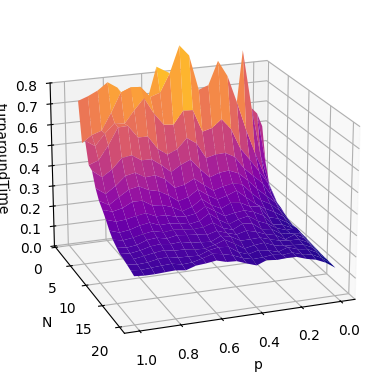

In [52]:
# 3d plot of turnaround time vs p and N
# interpolate the points to get a smooth surface

p = []
N = []
turnaroundTime = []
for key, element in filtered_dict.items():
    p.append(float(element['parameters']['$pCpuBound']))
    N.append(int(element['parameters']['$numCpus']))
    turnaroundTime.append(float(element['scalars']['turnaroundTime:mean']))

p = np.array(p)
N = np.array(N)
turnaroundTime = np.array(turnaroundTime)

# interpolate the points (p, N, turnaroundTime) to get a smooth surface
# using griddata

from scipy.interpolate import griddata
from numpy import ma

# create a meshgrid
p_unique = np.unique(p)
N_unique = np.unique(N)
p_grid, N_grid = np.meshgrid(p_unique, N_unique)

# interpolate the points
turnaroundTime_grid = griddata((p, N), turnaroundTime, (p_grid, N_grid), method='cubic')

# plot the surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Mask the values greater than or equal to 1
turnaroundTime_grid_masked = ma.masked_greater_equal(turnaroundTime_grid, 1)

# Plot the surface with the masked array
ax.plot_surface(p_grid, N_grid, turnaroundTime_grid_masked, cmap='plasma')
ax.set_xlabel('p')
ax.set_ylabel('N')
ax.set_zlabel('turnaroundTime')
ax.view_init(20, 70)
ax.set_zlim(0, 0.8)
plt.show()

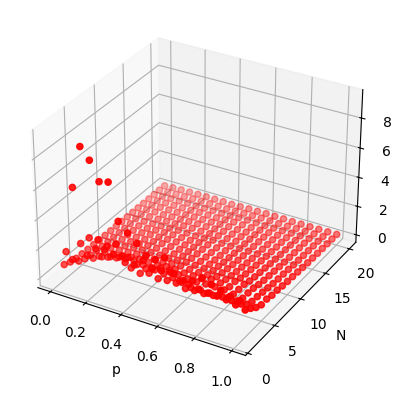

In [46]:
# 3d plot of turnaround time vs p and N

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(p, N, turnaroundTime, c='r', marker='o')
ax.set_xlabel('p')
ax.set_ylabel('N')
ax.set_zlabel('turnaroundTime')
plt.show()
